# Homework 2
By Diego Freire

## Part I: MapReduce with PySpark

Let's design a MapReduce program to estimate $\pi$ by "throwing darts" at a circle. Pick random points in the unit square ((0, 0) to (1, 1)) and see how many fall in the unit circle. The fraction should be $\pi/4$, so we use this to get our estimate.

<img src="https://onlyphysics.org/wp-content/uploads/2020/09/12_file.gif" width="300">

You may either write your own program or use the following program by completing the function `f(x)`.

In [ ]:
!pip install pyspark
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
from pyspark import SparkContext
import numpy as np

sc = SparkContext(master="local[*]") 

In [ ]:
from random import random

In [ ]:
def f(x):
    """
    Generate a random point (x,y) in the unit square [0,1)*[0,1).

    Return true if (x,y) lies in the unit circle; return false otherwise.
    """
    x = random()
    y = random()
    
    distance = (x*x + y*y)**(1/2)

    return 1 if distance < 1 else 0


In [ ]:
n_points = 10_000_000
count = sc.parallelize(range(n_points)).map(f).reduce(lambda x, y: x + y)
print("Pi is roughly %f" % (4.0 * count / n_points))

Pi is roughly 3.142578


# Part II: Finding Similar Items

Please complete the following exercises from Chapter 3 of the textbook Mining Massive Datasets (http://www.mmds.org/)

Exercise: 3.1.1, 3.2.1, 3.3.5, 3.4.1

You may write your solutions in Word or Latex. If there is something that is difficult to type, please write them down on a piece of paper and submit a picture of the solution.

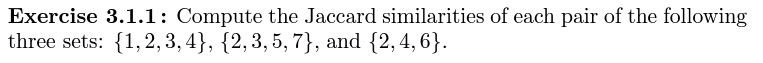

By Hand:

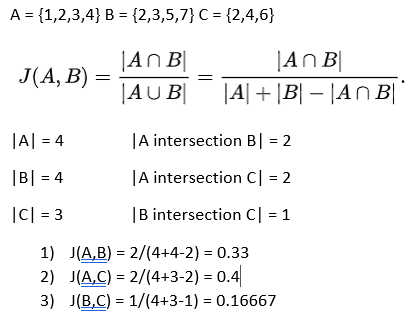

In [ ]:
# with a python function
def JaccardSimilarity(A,B):
  intersection = len(list(set(A).intersection(B)))
  union = (len(A) + len(B)) - intersection
  sim = intersection/union
  return sim
  
A = [1,2,3,4]
B = [2,3,5,7]
C = [2,4,6]

print("sim(A,B) = ",JaccardSimilarity(A,B))
print("sim(A,C) = ",JaccardSimilarity(A,C))
print("sim(B,C) = ",JaccardSimilarity(B,C))


sim(A,B) =  0.3333333333333333
sim(A,C) =  0.4
sim(B,C) =  0.16666666666666666


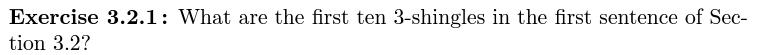

"The most effective way to represent documents as sets, for the purpose of identifying lexically similar documents is to construct from the document the set of short strings that appear within it."

 By hand:
 
 “The”, “he “, “e m”, “ mo”, “mos”, “ost”, “st “, “t e”, “ ef”, “eff”


In [2]:
# with a python function

def create_shingles(doc, k):
    """
    doc -- the content of a document
    k -- number of shingles
    """
    shingles = []

    doc_length = len(doc) 
    
    # slice the strings to get the desired shingles
    for i in range(doc_length - k + 1):
        slice = doc[i:i + k]
        shingles.append(slice)
        
    return shingles

In [3]:
doc = 'The most effective way to represent documents as sets, for the purpose of identifying lexically similar documents is to construct from the document the set of short strings that appear within it.'

shingle = create_shingles(doc, 3) 

print(shingle[:10])

['The', 'he ', 'e m', ' mo', 'mos', 'ost', 'st ', 't e', ' ef', 'eff']


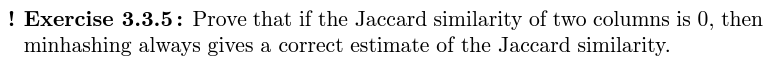

P[ h(A) = h(B) ] = J(A,B)

The value of J(A,B) goes from 0 <= J(A,B) <=1

If J(A,B) = 0

It means that A,B have an empty intersection

Thus, the similarity of these signatures is zero and it must be.


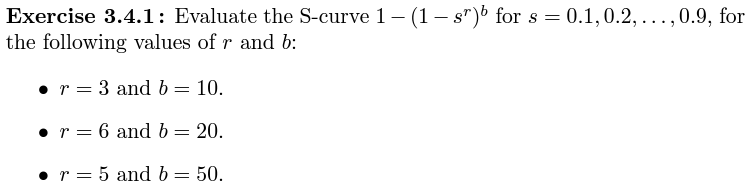

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

s = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def getSCurvePoints(s,r,b):
  # S Curve -> 1 - (1 - s^r)^b

  points = []
  for x in s:
    points.append(1 - (1 - x**r)**b)

  return points

def plotSCurve(points):
  plt.plot(points)
  plt.title('S-Curve')

def printValues(s,points):

  data = {'s':s,'1 - (1 - s^r)^b':points}
 
  # Creates pandas DataFrame.
  return pd.DataFrame(data)


,s,1 - (1 - s^r)^b
0,0.1,0.009955
1,0.2,0.077181
2,0.3,0.239449
3,0.4,0.483871
4,0.5,0.736924
5,0.6,0.912267
6,0.7,0.985015
7,0.8,0.999234
8,0.9,0.999998


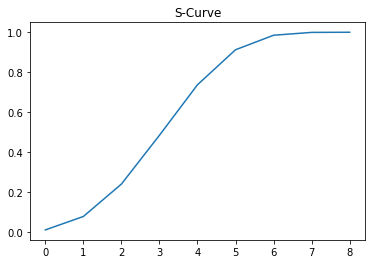

In [5]:
# evaluate for r = 3 and b = 10

points = getSCurvePoints(s,3,10)

df= printValues(s,points)

plotSCurve(points)

df


,s,1 - (1 - s^r)^b
0,0.1,0.000020
1,0.2,0.001279
2,0.3,0.014479
3,0.4,0.078809
4,0.5,0.270187
5,0.6,0.615415
6,0.7,0.918186
7,0.8,0.997712
8,0.9,1.000000


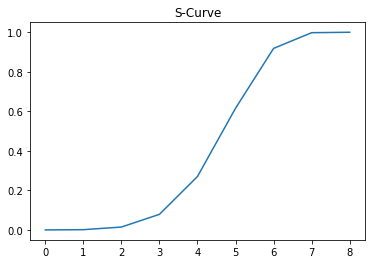

In [6]:
# evaluate for r = 6 and b = 20

points = getSCurvePoints(s,6,20)

df= printValues(s,points)

plotSCurve(points)

df

,s,1 - (1 - s^r)^b
0,0.1,0.000500
1,0.2,0.015875
2,0.3,0.114540
3,0.4,0.402284
4,0.5,0.795551
5,0.6,0.982534
6,0.7,0.999899
7,0.8,1.000000
8,0.9,1.000000


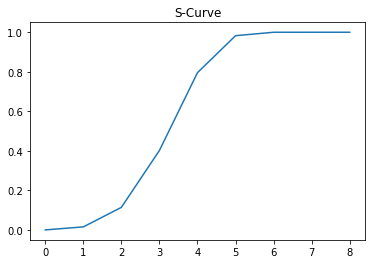

In [7]:
# evaluate for r = 5 and b = 50

points = getSCurvePoints(s,5,50)

df= printValues(s,points)

plotSCurve(points)

df